<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-24-KNN/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://1drv.ms/u/s!AmSu_rSXl5m3iTEdiabV6_MYBrJL?e=5Vxabf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from plotly import data

In [33]:
iris = data.iris()
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
6,4.6,3.4,1.4,0.3,setosa,1
64,5.6,2.9,3.6,1.3,versicolor,2
141,6.9,3.1,5.1,2.3,virginica,3
22,4.6,3.6,1.0,0.2,setosa,1
142,5.8,2.7,5.1,1.9,virginica,3


In [34]:
X = iris.drop(['species', 'species_id'], axis = 1)
Y = iris['species_id']

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [48]:
class KNN():
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, Y):
        self.x_train = X
        self.y_train = Y
    
    def distance(self, a, b):
        return np.sqrt(((a-b)**2).sum())

    def label(self, xq):
        # distance
        # k nearest
        # majority Vote

        dist = np.zeros(self.x_train.shape[0]) # x_train y_train

        for i, xt in enumerate(self.x_train.values):
            dist[i] = self.distance(xt, xq)
        
        idx = dist.argsort()
        idx = idx[:self.k]
        lab = self.y_train.iloc[idx]
        labels, counts = np.unique(lab, return_counts=True)
        return labels[counts.argmax()]

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.y_train.iloc[0])

        for i, x in enumerate(X.values):
            y_pred[i] = self.label(x)

        return y_pred

In [59]:
model = KNN(k=5)
model.fit(x_train, y_train)

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(x_test))

1.0

In [62]:
from sklearn.neighbors import KNeighborsClassifier

skmodel = KNeighborsClassifier(n_neighbors=5)
skmodel.fit(x_train, y_train)
accuracy_score(y_test, skmodel.predict(x_test))

1.0

In [76]:
test = []
train = []

for i in range(1, 100):
    model = KNeighborsClassifier(n_neighbors= i, n_jobs=-1, algorithm = 'kd_tree')
    model.fit(x_train, y_train)

    test.append(accuracy_score(y_test, model.predict(x_test)))
    train.append(accuracy_score(y_train, model.predict(x_train)))

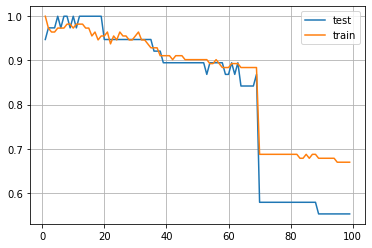

In [77]:
plt.plot(np.arange(1, 100), test, label = 'test')
plt.plot(np.arange(1, 100), train, label = 'train')
plt.legend()
plt.grid()